In [2]:
# run this cell to import needed packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [263]:
# just run this cell to read in the data, and drop a couple variables

df = pd.read_csv('https://github.com/YData123/sds265-fa22/raw/master/assignments/assn2/penguins.csv')
df = df.drop(columns=['index','year','island'])
df = df.dropna(axis=0)
df



,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male
340,Chinstrap,43.5,18.1,202.0,3400.0,female
341,Chinstrap,49.6,18.2,193.0,3775.0,male
342,Chinstrap,50.8,19.0,210.0,4100.0,male


In [264]:
# Next we'll make the sex variable binary, and separate out 
# species as the label to predict 

species = list(set(df['species']))
df['class'] = LabelEncoder().fit_transform(df['species'])
sex = [int(list(df['sex'])[j]=='male') for j in range(len(df))]
df['sex'] = sex
df = df.drop(columns=['species'])
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,class
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
4,36.7,19.3,193.0,3450.0,0,0
5,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,1
340,43.5,18.1,202.0,3400.0,0,1
341,49.6,18.2,193.0,3775.0,1,1
342,50.8,19.0,210.0,4100.0,1,1


### 1.1 Plotting the data

The following cell shows a scatter plot of all pairs of variables. We showed this type of plot in class for the California housing data. 
Describe several entries in this plot, and what it tells you about the 
the relationship between the pairs of covariates. Do the relationships make intuitive sense? Why or why not? Do the data appear to have any obvious outliers or unusual patterns? Why or why not?


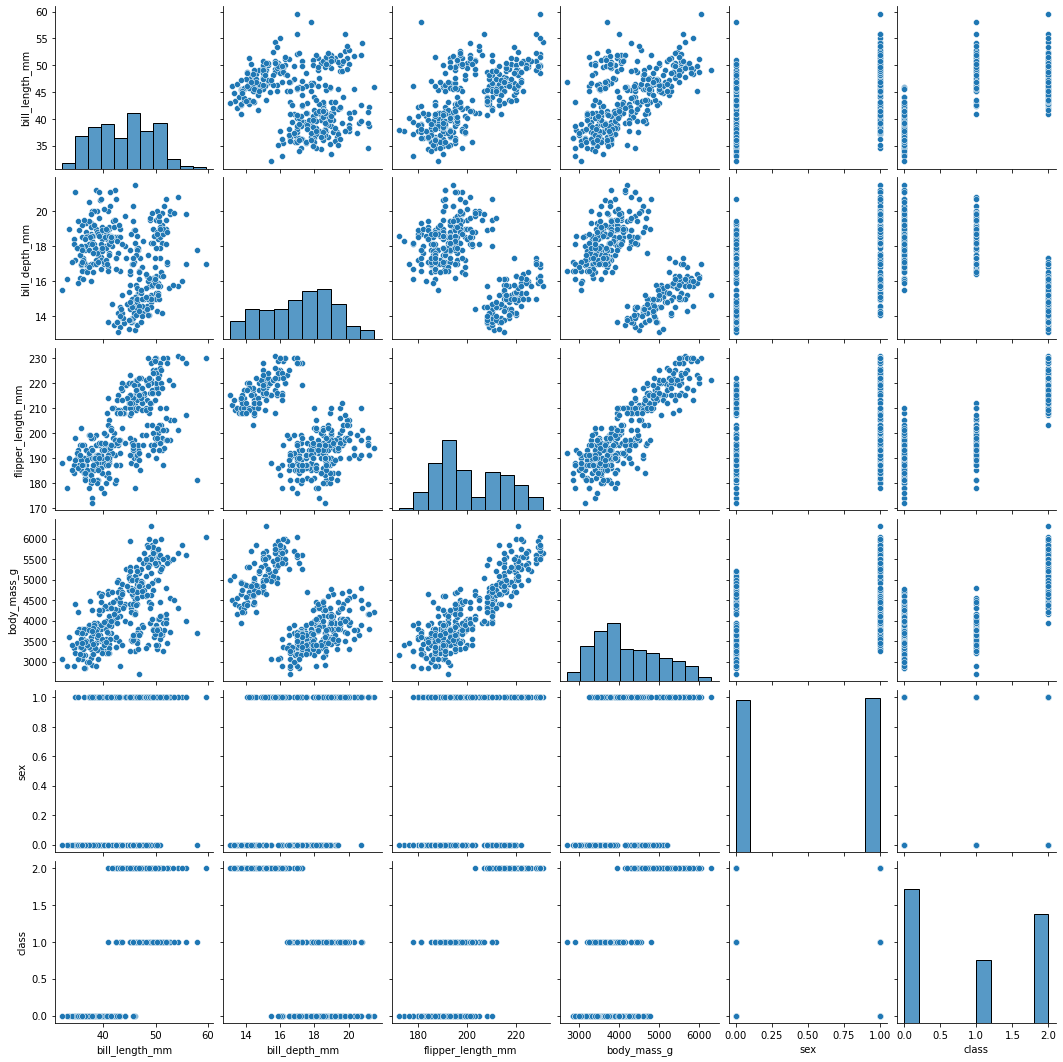

In [265]:
_ = sns.pairplot(df)

Bill length and flipper length covariates:
We can see that there are three clusters of points, and this probably is the three penguin species. 
Hence, we can say that some penguins tend to have shorter bills than the others, or shorter flippers than others.  Bill and flipper lengths are directly proportional. This is true with most entries on the plots apart from bill length vs bill depth, where the relationship is unlear. 

In [266]:
def plot_features(df, feature1_name, feature2_name):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    colors = ['orange', 'pink', 'lightgreen']
    species = ['Adelie', 'Chinstrap', 'Gentoo']

    for c in range(3):
        mask = (df['class']==c)
        plt.scatter(df[feature1_name][mask], 
                    df[feature2_name][mask], 
                    color=colors[c], label=species[c])

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.legend(loc='upper left')
    plt.show()
    


### 1.1 Plotting the data (continued)

Next, using the `plot_features` function above, 
give additional plots of pairs of features, shown together with 
the class labels. An example of such a plot is shown below:

<img src="https://github.com/YData123/sds265-fa22/raw/master/assignments/assn2/feature_plot.jpg" width="500" align="center" style="margin:10px 30px 10px 0px">

For each plot, discuss why the pair of features may or not be helpful in discriminating between the three species of penguins.

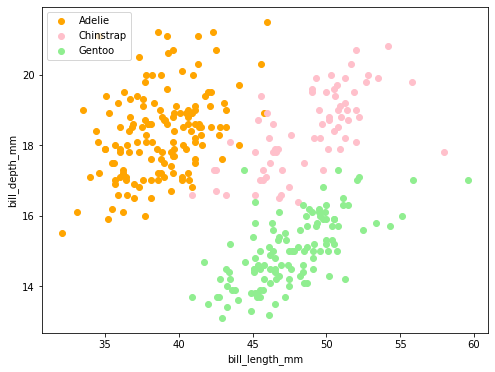

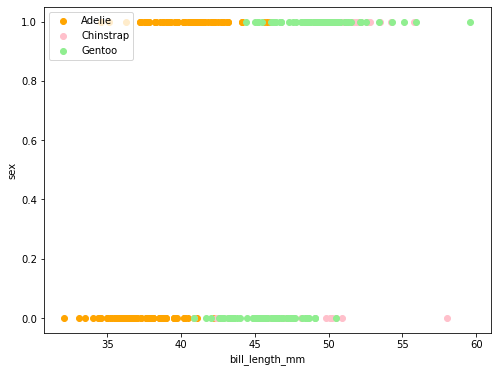

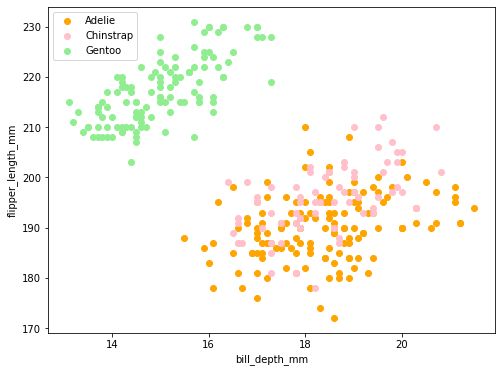

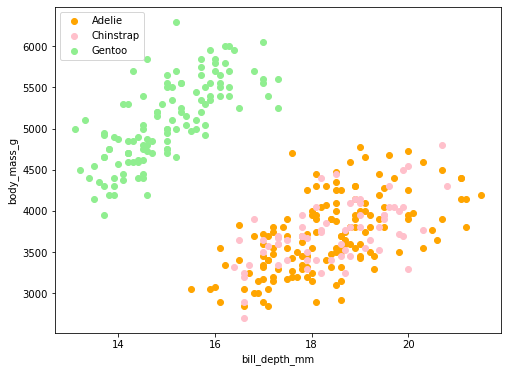

In [267]:
# your code and markdown here
plot_features(df, "bill_length_mm", "bill_depth_mm")

plot_features(df, "bill_length_mm", "sex")

plot_features(df, "bill_depth_mm", "flipper_length_mm")

plot_features(df, "bill_depth_mm", "body_mass_g")


#### Plot 1 ("bill_length_mm" vs "bill_depth_mm"): 
The pair of features here are very insightful for discrimination between the three species. This is because we can see a clear spread out plot. If both length and depth are higher that means that it is the Chinstrap species. But if just length is high and depth is low then it's Gentoo species and if length is low but depth is high then it is Adelie species.


#### Plot 2 ("bill_length_mm", "sex"): 
This set of features are not as useful. We can see a lot of overlap in the plot and cannot make out for sure what is going on. Although we can see that in both males and females, higher length means Gentoo and lower length means Adelie. 


#### Plot 3 ("bill_depth_mm", "flipper_length_mm"): 
This plot is not good for discriminating between the three species but it can be used to find out if the species is Gentoo or not. Since both Chinstrap and Adelie are overlapping.


#### Plot 4 ("bill_depth_mm", "body_mass_g"): 
Just like plot 3, this plot also is not good for discriminating between the three species but it can be used to find out if the species is Gentoo or not. Again, both Chinstrap and Adelie are overlapping.


In [268]:
# Just run the following cell, to get inputs X and labels y
y = np.array(df['class'])
X = df.copy()
X = X.drop(columns=['class'])
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1
340,43.5,18.1,202.0,3400.0,0
341,49.6,18.2,193.0,3775.0,1
342,50.8,19.0,210.0,4100.0,1


### 1.2 Standardize the data 

Next, standardize the data, so that each column of `X` has 
mean zero and standard deviation one. Note that after you have done this transformation, `X` should still be a `pandas.DataFrame`. Then, briefly explain why it is important to standardize the variables in the logistic regression models that you will train below.

In [269]:
X = (X-X.mean())/X.std()

X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.894695,0.779559,-1.424608,-0.567621,0.989542
1,-0.821552,0.119404,-1.067867,-0.505525,-1.007534
2,-0.675264,0.424091,-0.425733,-1.188572,-1.007534
4,-1.333559,1.084246,-0.568429,-0.940192,-1.007534
5,-0.858123,1.744400,-0.782474,-0.691811,0.989542
...,...,...,...,...,...
339,2.159064,1.338151,0.430446,-0.257145,0.989542
340,-0.090112,0.474872,0.073705,-1.002287,-1.007534
341,1.025333,0.525653,-0.568429,-0.536573,0.989542
342,1.244765,0.931902,0.644491,-0.132954,0.989542


Standardizing variables in logistic regression models is a very common best practice. It is important to do so since  logistic regression assumes that our data has a Gaussian distribution, i.e. the variables are on the same scales. Logistic regression is sensitive to the different ranges of variables. Hence, if the data are not on the same scale, some variables may be given much greater weight than others even if they shouldn't actually.

### 1.3 Fit logistic regressions

As done in the class demo for mushrooms and iris flowers, you will now  construct a series of logistic regression models using an increasing number of training points. 

Specifically, we want you to:

* vary the sample size from 10% of the data to 90% of the data, in increments of 10%
* for each sample size, train a logistic regression model on randomly selected training points, and test on the remaining data
* For each sample size, run 100 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

We will use the function sklearn.model_selection.train_test_split in each trial to randomly split the data into training and test sets.

Here we repeat exactly what we did during class using `lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')` to fit a logistic regression model to predict the three species  (*Adelie*, *Chinstrap*, and *Gentoo*). 

After filling in your code, simply run this cell to plot a learning curve of error rate as a function of training percentage.


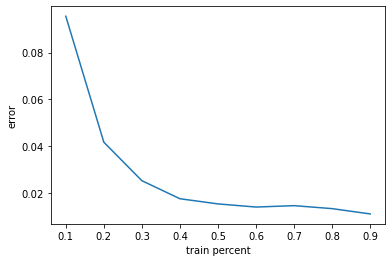

In [270]:
lr = LogisticRegression(penalty='l2', C=.1, multi_class='multinomial')

lr_error_rate = []
trials = 100
train_percent = np.linspace(.1, .9, 9)

# For each training set percentage, create train/test split accordingly
# and run logistic regression 100 times and calculate the average error rate

"""
function input:
  X: data
  y: label
  ratio: train data percentage
  trails: number of trails to run

function return:
  the average error rate with this train data percentage
"""

def get_err_rate(X, y, ratio, trials):
    # todo:
    # your code starts here
    err = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio)
        lr.fit(X_train, y_train)
        test_err = np.mean(lr.predict(X_test) != y_test)
        err.append(test_err)
    return np.mean(err)
    # your code ends here

# Use get_err_rate to find the error rate for respective split size
for p in train_percent:
    lr_error_rate.append(get_err_rate(X, y, p, trials))


plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
plt.ylabel('error')
plt.show()

### 1.4 Choose good feature pairs

Which pair of variables gives the best predictions of the species of penguins? Run some experiments and report back below!

Note that there are ${5 \choose 2} = 10$ ways you can choose a pair of features. You may want to run a loop to automate this :)




In [271]:
# todo:
# your code starts here
lr_error_rate=[]
feature1=[]
feature2=[]
features = list(X.columns.values)
for i in range(5):
    for j in range(i+1, 5):
        X_pair=X[[features[i], features[j]]]
        feature1.append(features[i])
        feature2.append(features[j])
        lr_error_rate.append(get_err_rate(X_pair, y, 0.9, trials))
        
good_features = pd.DataFrame({'Error Rate': lr_error_rate, 'Feature 1': feature1, 'Feature 2': feature2})
good_features = good_features.sort_values(by=['Error Rate'])
best = np.array(good_features.iloc[0])
bestfeatures=[best[1], best[2]]
print (good_features)
bestfeatures
# your code ends here

   Error Rate          Feature 1          Feature 2
1    0.041176     bill_length_mm  flipper_length_mm
2    0.062941     bill_length_mm        body_mass_g
0    0.063235     bill_length_mm      bill_depth_mm
4    0.193824      bill_depth_mm  flipper_length_mm
5    0.213235      bill_depth_mm        body_mass_g
8    0.214118  flipper_length_mm                sex
9    0.217353        body_mass_g                sex
7    0.232059  flipper_length_mm        body_mass_g
6    0.236471      bill_depth_mm                sex
3    0.238529     bill_length_mm                sex


['bill_length_mm', 'flipper_length_mm']

### 1.5 Visualize the decision boundries

Using the two features you chose as the best, and at least two additional 
pairs of features, visualize the decision boundries of the logistic regression models. 

Is it what you expected? Where are you observing incorrect predictions? Describe why the decision boundaries make sense, from your understanding of the logistic regression model.

Use the function `plot_decision_boundaries` that we supply below. (You may also modify this function to your liking.) An example plot is shown here: 

<img src="https://github.com/YData123/sds265-fa22/raw/master/assignments/assn2/sample_decision_boundaries.jpg" width="400" align="center" style="margin:10px 30px 10px 0px">


In [272]:
def plot_decision_boundaries(X, y, model, error):
    X2 = np.array(X)
    b = model.intercept_
    beta = model.coef_.T
    colors = ['orange', 'pink', 'lightgreen']
    h = 0.015
    x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], beta) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, levels=[0,.5,1.5,2.5], colors=colors, alpha=0.5)
    for c in range(3):
        mask = (y==c)
        plt.scatter(X2[np.array(mask),0], X2[np.array(mask),1], color=colors[c], label=species[c])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(loc='upper left')
    plt.title('error rate: %.2f' % error)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])


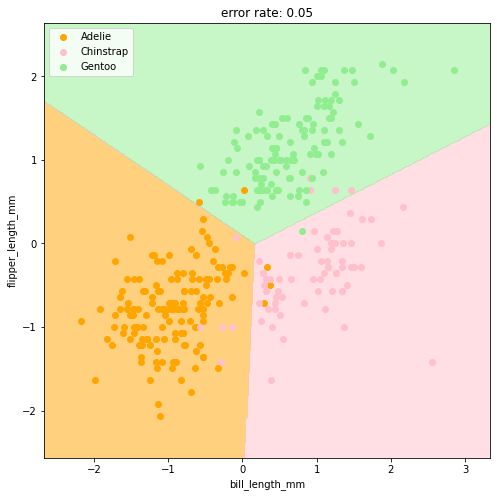

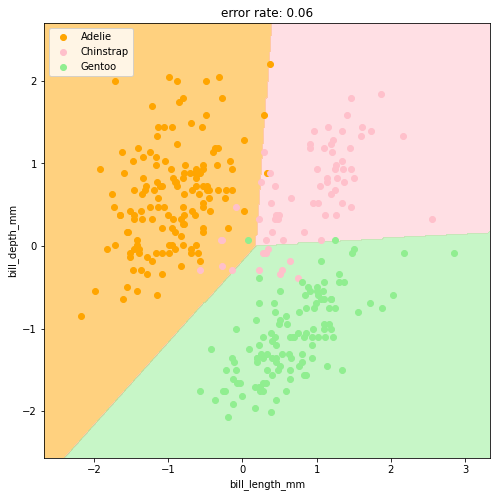

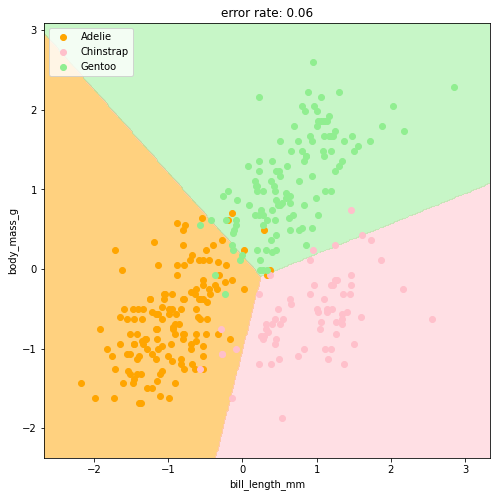

In [273]:
# Your code and markdown here
error_rate = get_err_rate(X[bestfeatures], y, 0.9, trials)
plot_decision_boundaries(X[bestfeatures], y, lr, error_rate)

error_rate2 = get_err_rate(X[["bill_length_mm", "bill_depth_mm"]], y, 0.9, trials)
plot_decision_boundaries(X[["bill_length_mm", "bill_depth_mm"]], y, lr, error_rate2)

error_rate3 = get_err_rate(X[['bill_length_mm', 'body_mass_g']], y, 0.9, trials)
plot_decision_boundaries(X[['bill_length_mm', 'body_mass_g']], y, lr, error_rate3)

This is what was expected.

Incorrect predictions are usually around the decision boundary.

The decision boundaries make sense as, apart from a few incorrect predictions, most of the species do lie inside their designated boundaries. 

In general, the boundaries are accurate

### 1.6 (Optional) Use different regularization levels (2 points EC)

Now that you have a working logistic regression algorithm, explore how to set the regularization level $C=1/\lambda$. Use an appropriate cross-validation procedure to choose the regularization level, and explain your results.

In [274]:
# Your code and markdown here

Hooray! You are now a penguin master!

## Problem 2: Mini-Batch Gradient Descent (25 points)

Consider a univariate logistic regression where we are trying to predict $Y$, which can take the value $0$ or $1$, from the variable $X$, which takes real values. Recall from lecture that we need to estimate parameters $\beta_{0}$ and $\beta_{1}$ by minimizing the penalized loss function:

$L(\beta_{0}, \beta_{1}) = \frac{1}{n}\sum\limits_{i=1}^{n} \left[ log\left( 1 + e^{\beta_{0} + X_{i}\beta_{1}}\right) - Y_{i}\left(\beta_{0} + X_{i}\beta_{1}\right)\right] + \lambda \beta_{1}^{2}$ .

Note that generally the intercept is not penalized.

In this problem, we will implement mini-batch gradient descent. At each iteration, a random set of $m$ samples from all $n$ samples is used to calculate the loss and gradient, which is the change in the loss with respect to the parameters. We then update the estimates of $\beta_{0}$ and $\beta_{1}$ based on the gradient.

Run the next cell to simulate data using the parameter values of $\beta_{0} = 3$ and $\beta_{1} = -5$.

In [275]:
n = 10000 
np.random.seed(265)
x1 = np.random.uniform(-5, 5, size=n) 
beta0 = 3
beta1 = -5
p = np.exp(beta0 + x1*beta1)/(1 + np.exp(beta0 + beta1*x1))
y = np.random.binomial(1, p, size=n)


Here is a helper function for plotting we'll use later. Just run this cell; don't change it.

In [276]:
def plot_betas_and_loss(beta0_all, beta1_all, loss_all, title=''):
    fig, ax = plt.subplots(1, 3, figsize=(18,5))
    ax[0].plot(np.arange(len(beta0_all)), beta0_all)
    ax[0].hlines(beta0, xmin=0, xmax=len(beta0_all),color = 'r')
    ax[0].set_xlabel("Iteration", fontsize=12)
    ax[0].set_ylabel(r"$\widehat{\beta}_{0}$", fontsize=12)

    ax[1].plot(np.arange(len(beta1_all)), beta1_all)
    ax[1].hlines(beta1, xmin=0, xmax=len(beta1_all),color = 'r')
    ax[1].set_xlabel("Iteration", fontsize=12)
    ax[1].set_ylabel(r"$\widehat{\beta}_{1}$", fontsize=12)
    ax[1].set_title(title)

    ax[2].plot(np.arange(len(loss_all)), loss_all)
    ax[2].set_xlabel("Iteration", fontsize=12)
    ax[2].set_ylabel("Loss", fontsize=12)
    plt.show()

## Part a: Deriving the updates

For given values of $\beta_{0}$ and $\beta_{1}$ the vector $\left( \dfrac{\partial}{\partial \beta_{0}} L_{t}(\beta_{0}, \beta_{1}), \dfrac{\partial}{\partial \beta_{1}} L_{t}(\beta_{0}, \beta_{1}) \right)^{T}$ is called the gradient of $L_{t}(\beta_{0}, \beta_{1})$ and is denoted $\nabla L_{t}(\beta_{0}, \beta_{1})$.

Calculate the derivative of $L_{t}(\beta_{0}, \beta_{1})$ with respect to $\beta_{0}$, treating $\beta_{1}$ as a constant. (i.e. calculate $\dfrac{\partial}{\partial \beta_{0}} L_{t}(\beta_{0}, \beta_{1})$). 

Be sure to show your work by either typing it in here using LaTeX, or by taking a picture of your handwritten solutions and displaying them here in the notebook. (If you choose the latter of these two options, be sure that the display is large enough and legible. Please also upload a photo seperately to Gradescope in case the embedded image failed.)

$\beta_0$ partial: $\frac{\partial}{\partial \beta_0} (\frac{1}{n} \sum_{i=1}^{n} [\log(1+e^{\beta_0 + X_i \beta_1}) - Y_i(\beta_0 + X_i \beta_1)] + \lambda \beta_{1}^{2})$

$= \frac{1}{n} \sum_{i=1}^{n} [\frac{e^{\beta_0 + X_i \beta_1}}{1 + e^{\beta_0 + X_i \beta_1}} - Y_i]$


Now calculate the derivative of $L_{t}(\beta_{0}, \beta_{1})$ with respect to $\beta_{1}$, treating $\beta_{0}$ as a constant. (i.e. calculate $\dfrac{\partial}{\partial \beta_{1}} L_{t}(\beta_{0}, \beta_{1})$).

Be sure to show your work by either typing it in here using LaTeX, or by taking a picture of your handwritten solutions and displaying them here in the notebook. (If you choose the latter of these two options, be sure that the display is large enough and legible. Please also upload a photo seperately to Gradescope in case the embedded image failed.)

$\beta1$ partial: $\frac{\partial}{\partial \beta_1} (\frac{1}{n} \sum_{i=1}^{n} [\log(1+e^{\beta_0 + X_i \beta_1}) - Y_i(\beta_0 + X_i \beta_1)] + \lambda \beta_{1}^{2})$

$= \frac{1}{n} \sum_{i=1}^{n} [\frac{X_i e^{\beta_0 + X_i \beta_1}}{1 + e^{\beta_0 + X_i \beta_1}} - X_i Y_i] + 2\lambda \beta_1$

When we implement mini-batch stochastic gradient descent, we will use these formulas, but 
apply them to a mini-batch of $m$ randomly chosen datapoints, rather than to all $n$ datapoints 
(in our case $n=10,000$).
Typically $m$ is chosen to be much, much smaller than $n$.




## Part b: The key ingredients

Complete the function `update` in the following cell which takes values for $\beta_{0}$ and $\beta_{1}$, a list `inds`  containing the indexes of the $m$ selected samples, as well as a step-size $\eta$, and returns updated values for $\beta_{0}$ and $\beta_{1}$ from one step of gradient descent (using all the data and your answer to Part a). 

In [277]:
def update(b0, b1, inds, step_size, lamb):
    L_partial0 = 0
    L_partial1 = 0
    for i in inds:
        L_partial0 += (np.exp(b0+x1[i]*b1))/(1+np.exp(b0+b1*x1[i]))-y[i]
        L_partial1 += (x1[i]*(np.exp(b0+x1[i]*b1)))/(1+np.exp(b0+b1*x1[i]))-y[i]*x1[i]
    
    L_partial0 = L_partial0/len(inds)
    L_partial1 = L_partial1/len(inds) + 2*lamb*b1
    
    b0 -= step_size * L_partial0
    b1 -= step_size * L_partial1
    
    return (b0, b1)


Now complete the function in the next cell called `loss` which takes values for $\beta_{0}$ and $\beta_{1}$,
together with a subset of indices and regularization parameter, and returns the value of the loss function evaluated at those data points.

In [278]:
def loss(b0, b1, inds, lamb):
    output = 0
    for i in inds:
        output += np.log(1 + np.exp(b0 + x1[i]*b1)) - y[i]*(b0 + x1[i]*b1)
        
    output = (output/len(inds)) + lamb*pow(b1, 2)
    
    return output

## Part c: Putting it all together 

Now complete the implementation of `minibatch_grad_descent` which puts all of these pieces together

In [279]:
def minibatch_grad_descent(b0=0, b1=0, batch_size=100, step_size=10, lamb=0, iterations=1000):
    beta0_hat = b0
    beta1_hat = b1
    beta0_all = []
    beta1_all = []
    loss_all = []

    for iter in range(iterations):   
        inds = np.random.choice(range(n), batch_size)  # your implementation: sample batch_size indices
        batch_loss = loss(beta0_hat, beta1_hat, inds, lamb) # your implementation: call loss()
        beta0_hat, beta1_hat = update(beta0_hat, beta1_hat, inds, step_size, lamb) # your implementation: call update()

        beta0_all.append(beta0_hat)
        beta1_all.append(beta1_hat)
        loss_all.append(batch_loss)
        iter = iter+1
        
    return (beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all)

Now, test your implementation by running the following cell, which will call the function 
with the default parameters, and then plot the beta parameters and loss during the course 
of stochastic gradient descent. We will check your plot as a first check that you have a correct implementation!


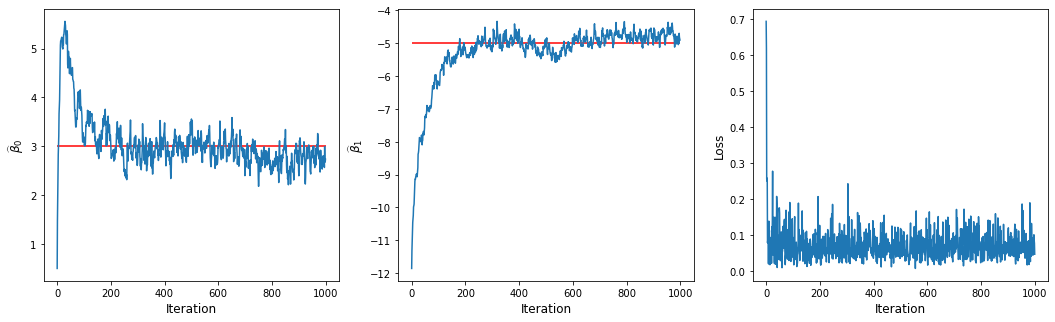

In [280]:
# Run this cell, don't change it!

beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all = minibatch_grad_descent()
plot_betas_and_loss(beta0_all, beta1_all, loss_all)


## Part d: Assessing uncertainty

We now use the code above that implements mini-batch gradient descent and 
run it several (30) times. We then display the mean and standard deviation of 
the estimates.


In [281]:
# run this cell, don't change it

from tqdm import tqdm

beta0_hat_all_0 = []
beta1_hat_all_0 = []
for rep in tqdm(range(30)):
    beta0_hat, beta1_hat, _, _, _ = minibatch_grad_descent()
    beta0_hat_all_0.append(beta0_hat)
    beta1_hat_all_0.append(beta1_hat)
    
print('The mean of the estimated beta0 is %.2f' % np.mean(beta0_hat_all_0))
print('The standard deviation of the estimated beta0 is %.3f' % np.std(beta0_hat_all_0))
print('The mean of the estimated beta1 is %.2f' % np.mean(beta1_hat_all_0))
print('The standard deviation of the estimated beta1 is %.3f' % np.std(beta1_hat_all_0))

100%|██████████| 30/30 [00:55<00:00,  1.86s/it]

The mean of the estimated beta0 is 2.94
The standard deviation of the estimated beta0 is 0.225
The mean of the estimated beta1 is -4.82
The standard deviation of the estimated beta1 is 0.166


Comment on these results:

1. Describe what causes the variation in the estimates. 
1. How would you construct approximate 95% confidence intervals for the estimates? 
1. Do the true parameters fall in those confidence intervals?

1. The continuous gradient update to the estimated values using a fixed step size is causing the variation in the estimates
2. We add or subtract two standard deviations from the mean to construct the 95% confidence interval
3. Yes, the true parameters do fall into the confidence interval

## Part e: Comparing mini-batch  sizes

Repeat Part c with different $m$ (the size of the mini-batches), e.g. $m=1000$, $m=100$, and $m=10$. Use (0,0) as the initial estimates of $\beta_{0}$ and $\beta_{1}$. Plot $\beta_{0}$, $\beta_{1}$, and $L(\beta_{0}, \beta_{1})$ vs. iteration number. How do the plots change as you change m? Are the changes consistent with your expectation? Why or why not?

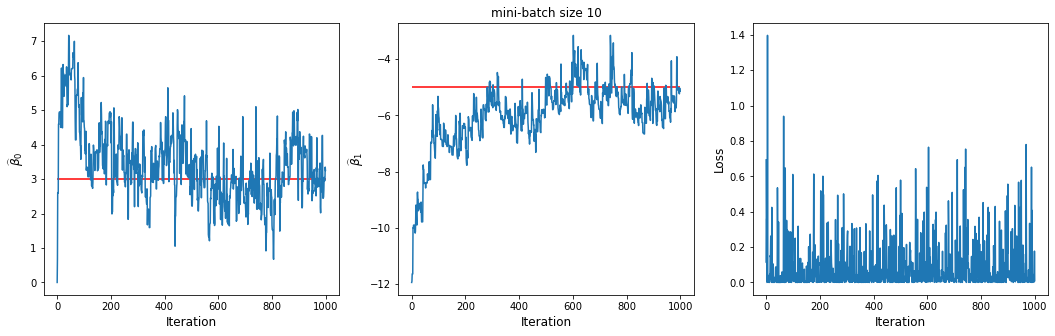

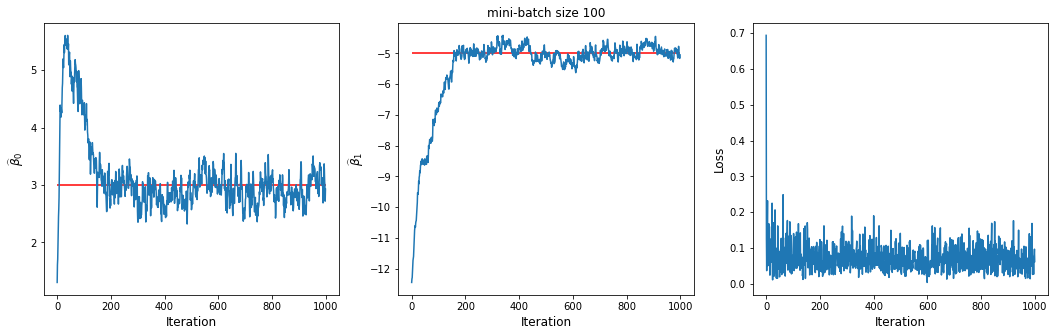

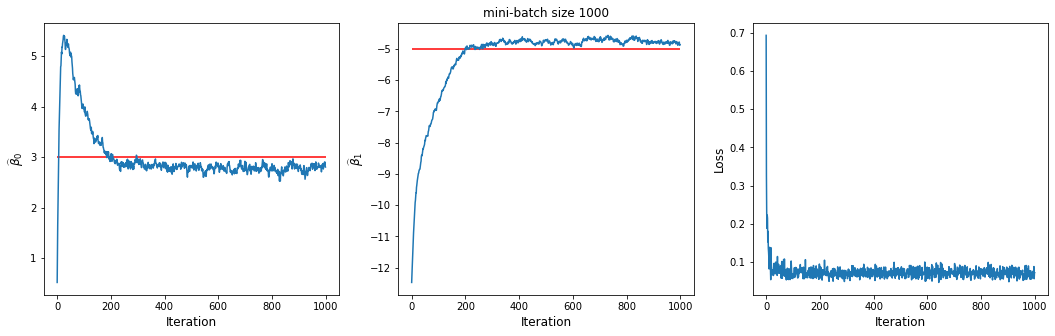

In [282]:
# run this cell, don't change it

for batch_size in [10, 100, 1000]:
    _, _, beta0_all, beta1_all, loss_all = minibatch_grad_descent(batch_size=batch_size)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title='mini-batch size %d' % batch_size)


Comment on these results:

1. Describe what causes the differences in the plots across the three batch sizes. 
1. Does one of the three runs give a better estimate than the others? Why or why not? _


1. As the size of the mini batch size increases, it results in more accurate estimations for each step of gradient descent. This is because there are more data points which causes lower variance and hence causes the estimates to be closer to the real value. Hence, as the batch size increases, we can observe the graph getting smoother
2. Yes, the run which has the larger batch size gives a better estimate. This is because the estimates are closer to the real value owing to lower standard deviations.

## Part f: Comparing regularization levels


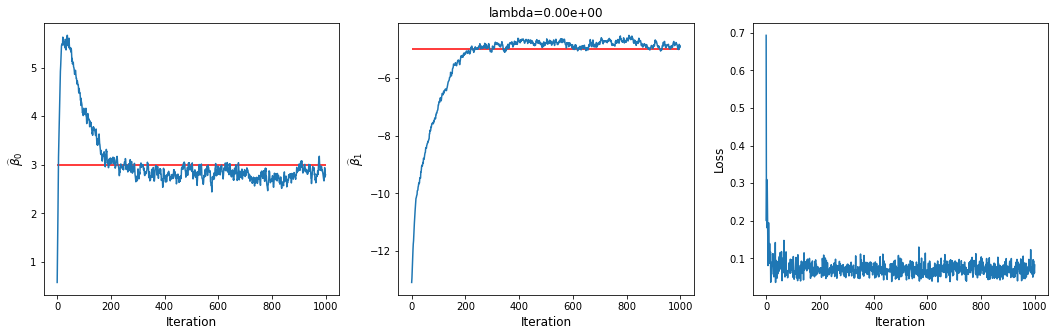

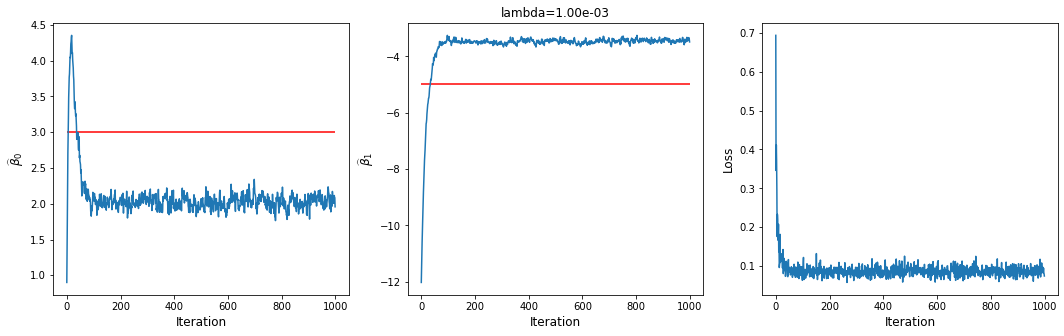

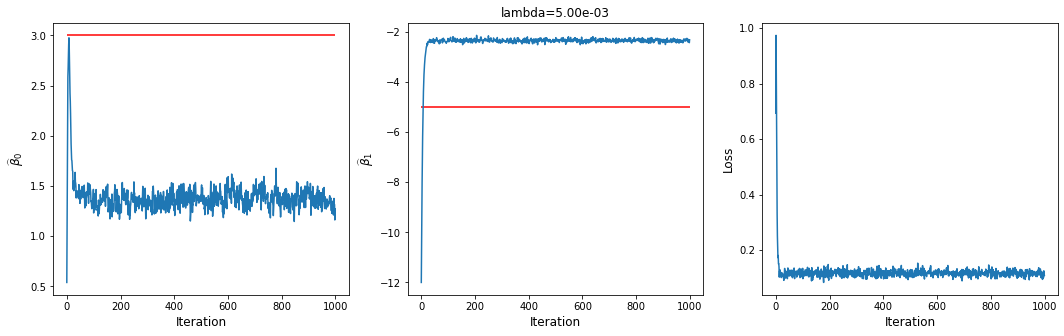

In [283]:
# run this cell, don't change it

for lamb in [0, .001, .005]:
    _, _, beta0_all, beta1_all, loss_all = minibatch_grad_descent(batch_size=500, lamb=lamb)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title = 'lambda=%.2e' % lamb)

Comment on these results:

1. Describe what causes the differences in the plots across the three regularization levels.
#_as increase regularization penalty, not converging to right parameters and getting higher loss
1. Does one of the three runs give a better estimate than the others? Why or why not?
#_

1. As the regularization level increases, $\beta1$ gets closer and closer to zero. This is known as the shrinkage effect. To keep in check with the decision boundary for the true parameters $-\frac{\beta0}{\beta1}=-\frac{3}{5}$, even $\beta0$ shrinks with $\beta1$

2. Yes, the first run gives a better estimate than the others. This is because it has no regularization due to there being a lot of data. The parameters are close to the true values

## Part g: Comparing step sizes

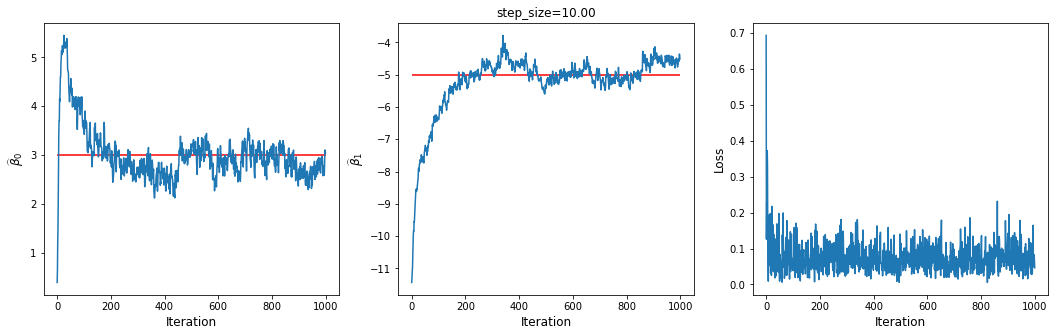

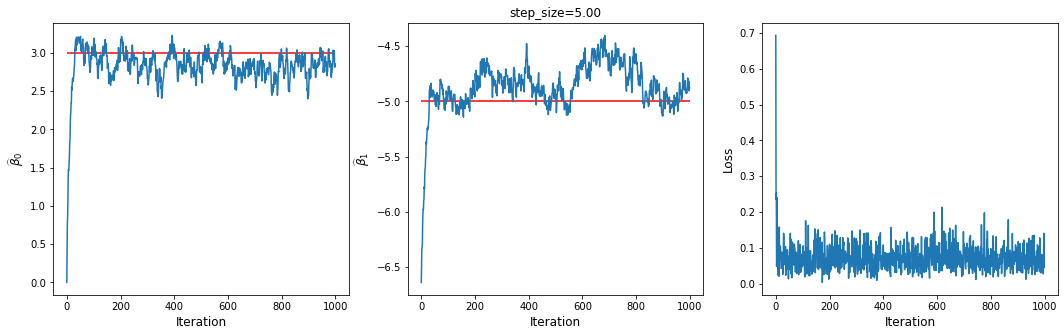

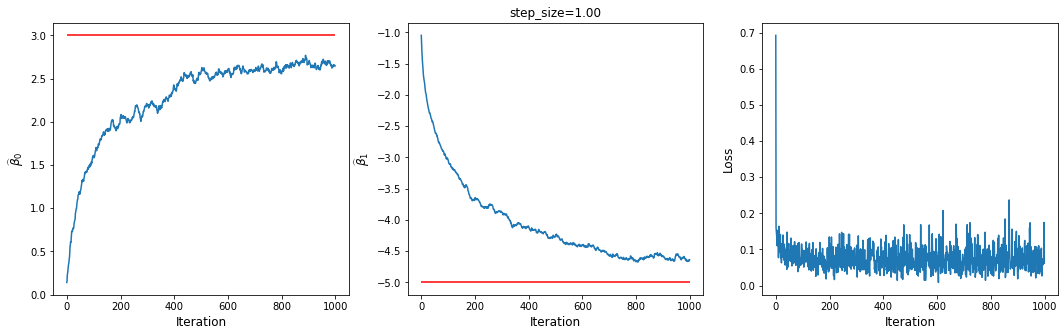

In [284]:
# run this cell, don't change it

for step_size in [10, 5, 1]:
    _, _, beta0_all, beta1_all, loss_all = minibatch_grad_descent(batch_size=100, step_size=step_size)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title = 'step_size=%.2f' % step_size)

Comment on these results:

1. Describe what causes the differences in the plots across the three different step sizes.
2. Has the run with the smallest step size converged? Why or why not?
3. Describe how you would choose the step size and the final parameter estimates.

1. As the step size decreases, the convergence slows down. We can see how step size of 10 is too big. This causes $\beta0$ to first jump too much above 3 before it comes down to around 3.  
2. We can see with the step size of 1 that the has not converged. This is because $\beta0$ is increasing and $\beta1$ is decreasing
3. We need to choose a constant $C$ for the step size $C$/$\sqrt{t}$ such that the loss appears to converge. We need to keep doing this until the change is parameters is very small.

## Problem 3. Bias and Variance and Trees, Oh My! (20 points)


In this problem you will explore the bias-variance tradeoff for decision trees using a simple toy regression problem. We start by importing a few packages.


In [285]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

The following cell defines and plots the data for this regression problem. The true regression function is `f`; the response `y` is `f` plus noise. The true function is -1 above the line `x1==x2` and 1 below the line. Just run this cell; do not modify it.

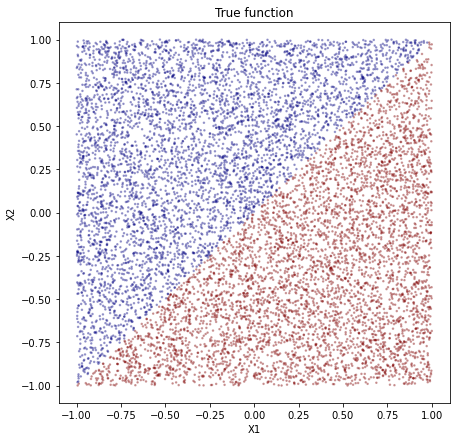

In [286]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0] - X[:,1])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('True function')

### 1.1 Build regressions trees with different depth

In this problem you are asked to build a sequence of regression trees using this data, to predict `y` from `x1` and `x2`, varying the tree depth. 

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Test on the remaining 10000 - 500 data points
* Run 500 trials (train/test splits) for each depth.
* Plot the MSE as a function of the maximum tree depth

The cell below contains some starter code. You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the mean squared error on the test data versus the depth.*

100%|██████████| 7/7 [00:04<00:00,  1.56it/s]


Text(0, 0.5, 'MSE')

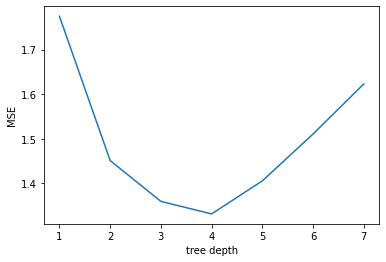

In [287]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = []

from tqdm import tqdm

for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    MSE_tree = []
    for trials in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05)
        dtree = rtree.fit(X_train, y_train)
        sample_MSE = np.mean(np.square(dtree.predict(X_test)-y_test))
        MSE_tree.append(sample_MSE)
    test_mean_squared_error.append(np.mean(MSE_tree))

fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

### 1.2 What is the best size of tree?

(a) According to your plot above, what is the best tree depth to choose?

(b) If the regression trees were trained on 5000 data points, rather than 500, how would the choice of tree depth change? Would it increase or decrease? Explain why. Try to answer this question without running any code! If you run an experiment, comment on this in your answer.


(a) From the plot we can see that the best size of the tree is 4. This is because at a tree depth of 4, it has minimum MSE

(b) The tree depth will remain the same. Although, the estimated MSE will decrease since we have more data to train on

### 1.3 Estimate the squared bias and variance

Now estimate the squared bias and variance of the trees as a function of the maximum depth. This is possible in this case because you know the true function `f`, which was defined above. Use the same setup as above:

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Run 500 trials for each train/test split.

To estimate the squared bias and variance, evaluate each of the models on each of the $n=10,000$ data points. You can then estimate the squared bias and variance of the predictions $\hat y_i = \hat f(x_i)$ and take the average 
over all the data points.

Hint: Consider using the fact that the variance of a random variable can be written as $\mbox{Var}(Z) = \mathbb{E}(Z^2) - \mathbb{E}(Z)^2$.  The cell below contains starter code based on this hint. You will need to use the true regression function `f` defined above as a numpy array.

You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the squared bias and variance.*

100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


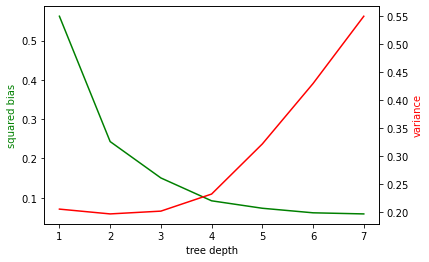

In [288]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05)
        rtree = rtree.fit(X_train, y_train)
        E_yhat = E_yhat + rtree.predict(X)
        E_yhat_squared = E_yhat_squared + np.square(rtree.predict(X))
    
    E_yhat = E_yhat/trials
    E_yhat_squared = E_yhat_squared/trials
        
    # just run the following lines (or modify as needed)
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

### 1.4 Do the bias and variance make sense?

(a) Explain why your plots of the squared bias and variance make sense, and are consistent with your plot of the MSE computed previously.

(b) What is the (approximate) value of the difference between the MSE and the sum of the squared bias and variance for this data set?


(a) The plot of squared bias and variance does make sense because as we increase tree depth, the model becomes more complex which results in decrease in bias and increase in variance. This is consistent as bias and variance are inversely proportional since Risk = squared bias + variance

(b) That can be given by: MSE - (squared bias + variance). This is approximately close to 1.
Calculating this accurately, MSE, squared bias and variance for tree depth of 4 below and finding out the answer:

In [289]:
mse_4 = test_mean_squared_error[3]
sqbias_4 = bias_squared[3]
var_4 = variance[3]

ans = mse_4 - (sqbias_4 + var_4)
ans

1.0073029484820877

### 1.5 Changing the target function

Now, suppose that the true function is changed from a step function on the diagonal to a step function that is along the vertical line `X1=0`. The following line creates this data; do not modify:

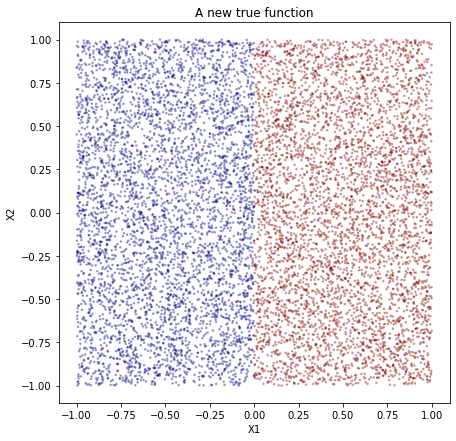

In [290]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('A new true function')

Now repeat parts 1.1 through 1.4 above using this new target function. 

Try to predict what is going to happen before running any code!
Then, you can simply copy your code above, and paste it below for this new target function. 

In your answers to questions 1.2 and 1.4, comment on *why* the answers are different (or the same) for this new vertical regression function, versus the original along the diagonal.

### 1.1

100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Text(0, 0.5, 'MSE')

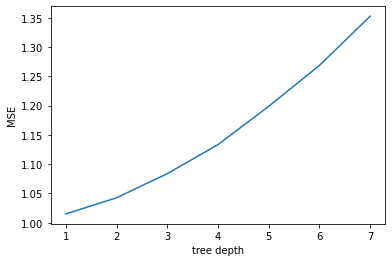

In [292]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = []

from tqdm import tqdm

for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    MSE_tree = []
    for trials in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05)
        dtree = rtree.fit(X_train, y_train)
        sample_MSE = np.mean(np.square(dtree.predict(X_test)-y_test))
        MSE_tree.append(sample_MSE)
    test_mean_squared_error.append(np.mean(MSE_tree))

fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

### 1.2 What is the best size of tree?

(a) According to your plot above, what is the best tree depth to choose?

(b) If the regression trees were trained on 5000 data points, rather than 500, how would the choice of tree depth change? Would it increase or decrease? Explain why. Try to answer this question without running any code! If you run an experiment, comment on this in your answer.

(a) According to this plot, the best tree depth seems to be 1

(b) The choice of the tree depth would remain the same and so would the mean squared error.

### 1.3

100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


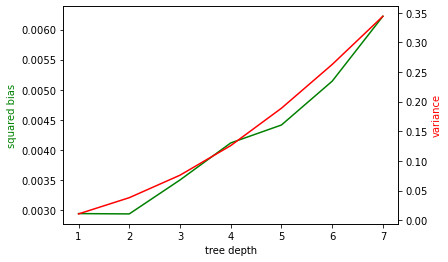

In [293]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05)
        rtree = rtree.fit(X_train, y_train)
        E_yhat = E_yhat + rtree.predict(X)
        E_yhat_squared = E_yhat_squared + np.square(rtree.predict(X))
    
    E_yhat = E_yhat/trials
    E_yhat_squared = E_yhat_squared/trials
        
    # just run the following lines (or modify as needed)
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

### 1.4 Do the bias and variance make sense?

(a) Explain why your plots of the squared bias and variance make sense, and are consistent with your plot of the MSE computed previously.

(b) What is the (approximate) value of the difference between the MSE and the sum of the squared bias and variance for this data set?


(a) This plot makes sense because we can see we have the lowest risk (i.e. squared bias anfd variance) at the tree depth of 1 which is the same tree depth where there is the lowest MSE.

(b) The approximate value of the difference between the MSE and the sum of squared bias and variance is still very close to 1. The exact calculations are given below:

In [294]:
bias_1 = bias_squared[0]
var_1 = variance[0]
mse_1 = test_mean_squared_error[0]
ans_1 = mse_1 - (var_1+bias_1)
ans_1

1.0015063796858215